In [1]:
import pandas as pd
import numpy as np

In [2]:
df_starbucks = pd.read_excel('/content/Starbucks data.xlsx')

In [3]:
df_starbucks.head()

,Amount of Prepaid card,Age,Days per month at starbucks,Income,Cups of Coffee per day
0,5,25,4,20,1
1,25,30,12,35,5
2,10,27,10,30,4
3,5,42,8,30,5
4,15,29,11,25,8


In [5]:
df_starbucks.shape

(25, 5)

In [6]:
df_starbucks.isnull().sum()

,0
Amount of Prepaid card,0
Age,0
Days per month at starbucks,0
Income,0
Cups of Coffee per day,0


In [7]:
df_starbucks.duplicated().sum()

np.int64(0)

In [8]:
df_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Amount of Prepaid card       25 non-null     int64
 1   Age                          25 non-null     int64
 2   Days per month at starbucks  25 non-null     int64
 3   Income                       25 non-null     int64
 4   Cups of Coffee per day       25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [9]:
df_starbucks.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount of Prepaid card,25.0,31.80,40.745143,5.0,10.0,20.0,35.0,200.0
Age,25.0,32.72,8.403967,20.0,27.0,30.0,38.0,51.0
Days per month at starbucks,25.0,10.76,4.013311,3.0,8.0,10.0,12.0,19.0
Income,25.0,36.20,13.865425,20.0,30.0,35.0,40.0,80.0
Cups of Coffee per day,25.0,4.60,2.345208,1.0,3.0,5.0,5.0,10.0


In [10]:
# checking for outliers for each column in df_starbucks

def find_outliers_IQR(df):
    outliers = {}
    for col in df.select_dtypes(include=['number']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
outliers = find_outliers_IQR(df_starbucks)
# for col, outlier_df in outliers.items():
#     print(f"Outliers in column '{col}':")
#     print(outlier_df)
#     print("-" * 20)


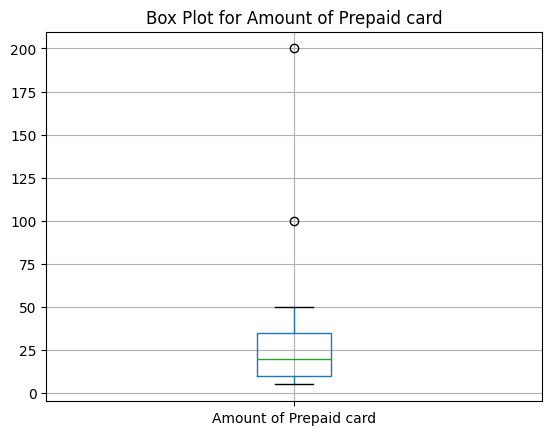

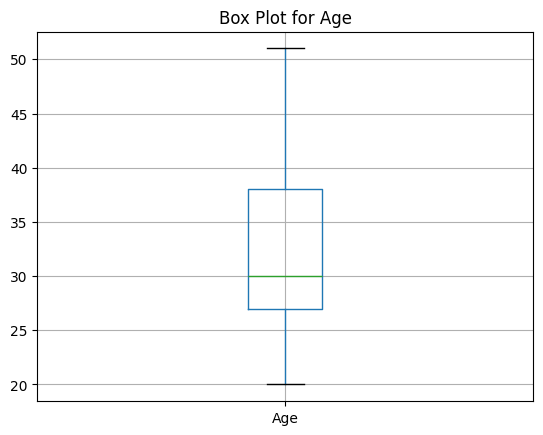

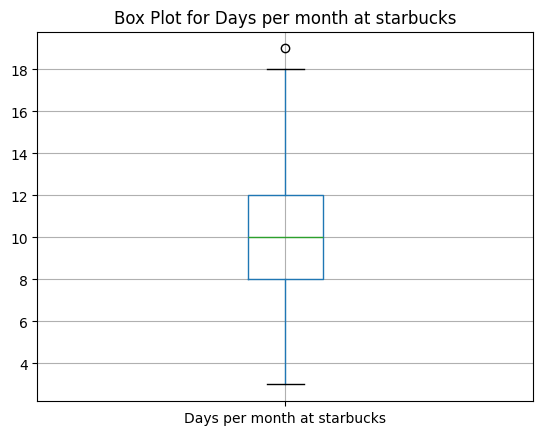

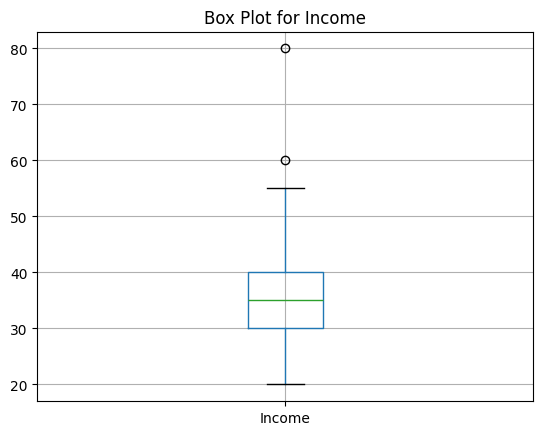

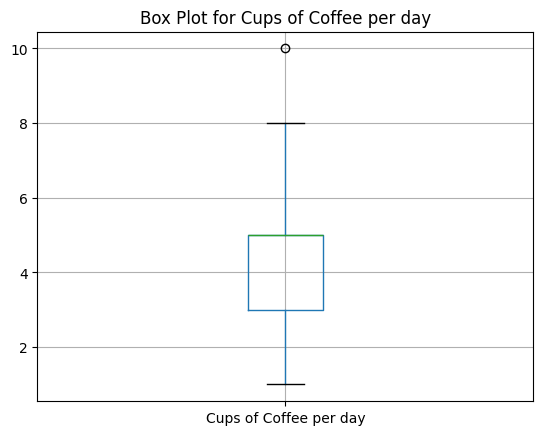

In [11]:
# plotting box plot for each column

import matplotlib.pyplot as plt

for col in df_starbucks.columns:
  plt.figure()
  df_starbucks.boxplot(column=[col])
  plt.title(f'Box Plot for {col}')
  plt.show()


In [13]:
# Treating all the detected outliers in df_starbucks using iqr

def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

for col in df_starbucks.select_dtypes(include=['number']).columns:
    df_starbucks = treat_outliers_iqr(df_starbucks, col)

print(df_starbucks.describe())


       Amount of Prepaid card        Age  Days per month at starbucks  \
count               25.000000  25.000000                    25.000000   
mean                25.600000  32.720000                    10.720000   
std                 19.635745   8.403967                     3.931921   
min                  5.000000  20.000000                     3.000000   
25%                 10.000000  27.000000                     8.000000   
50%                 20.000000  30.000000                    10.000000   
75%                 35.000000  38.000000                    12.000000   
max                 72.500000  51.000000                    18.000000   

          Income  Cups of Coffee per day  
count  25.000000               25.000000  
mean   35.000000                4.520000  
std    10.801234                2.181742  
min    20.000000                1.000000  
25%    30.000000                3.000000  
50%    35.000000                5.000000  
75%    40.000000                5.000000 

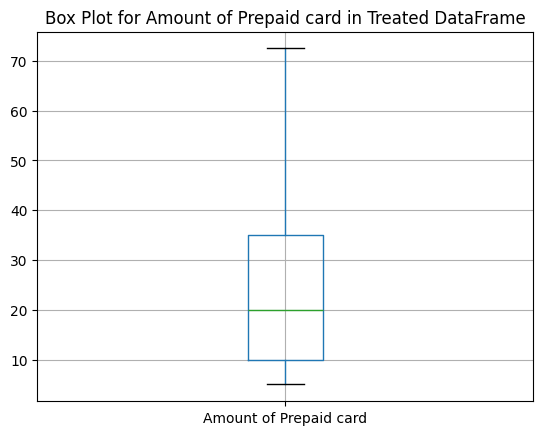

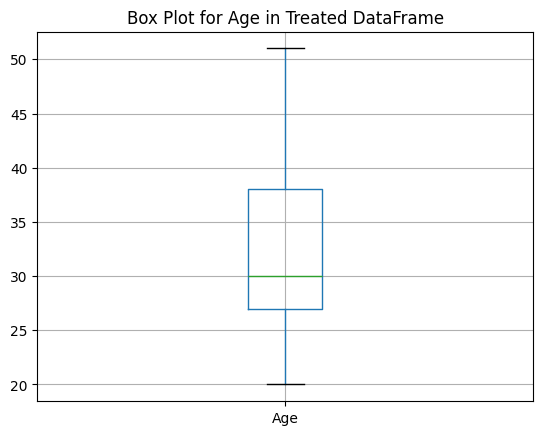

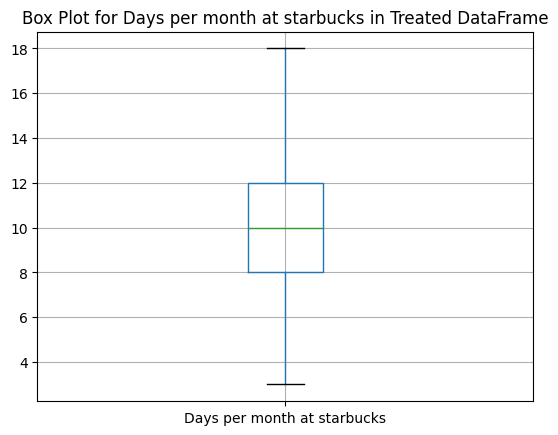

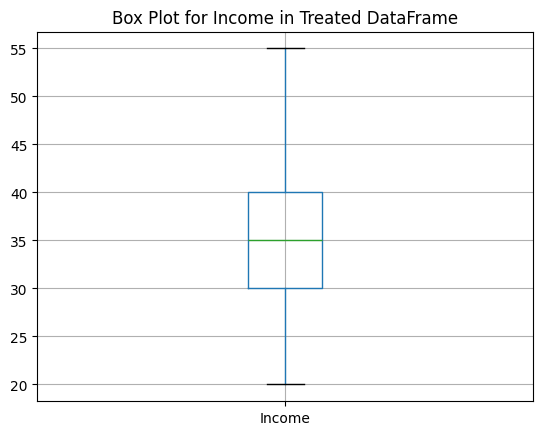

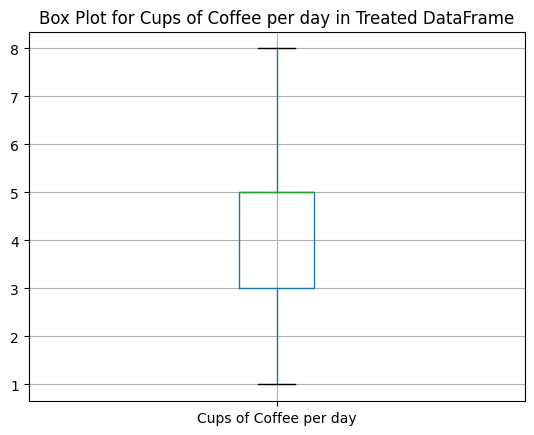

In [14]:
# plotting box plots of each column in df_starbucks_treated

for col in df_starbucks.select_dtypes(include=['number']):
  plt.figure()  # Create a new figure for each boxplot
  df_starbucks.boxplot(column=[col])
  plt.title(f'Box Plot for {col} in Treated DataFrame')
  plt.show()


In [15]:
df_starbucks.columns

Index(['Amount of Prepaid card', 'Age', 'Days per month at starbucks',
       'Income', 'Cups of Coffee per day'],
      dtype='object')

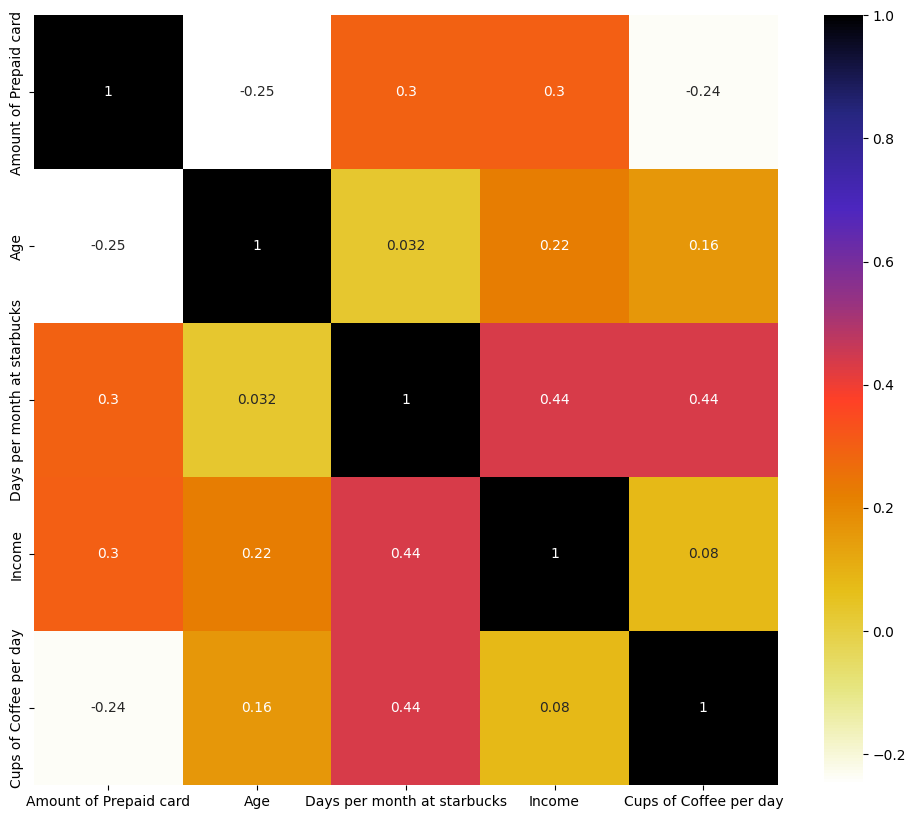

In [16]:
# checking for correlation using heatmap

import seaborn as sns
plt.figure(figsize=(12, 10))
cor = df_starbucks.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [17]:
x = df_starbucks.drop('Cups of Coffee per day', axis=1)
y = df_starbucks['Cups of Coffee per day']

In [18]:
x.head()

,Amount of Prepaid card,Age,Days per month at starbucks,Income
0,5.0,25.0,4.0,20.0
1,25.0,30.0,12.0,35.0
2,10.0,27.0,10.0,30.0
3,5.0,42.0,8.0,30.0
4,15.0,29.0,11.0,25.0


In [19]:
y.head()

,Cups of Coffee per day
0,1.0
1,5.0
2,4.0
3,5.0
4,8.0


In [20]:
# checking for multi colinearity in x

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature in x
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

# You can set a threshold for VIF (e.g., 5 or 10) to identify highly multicollinear features
# Features with VIF > threshold indicate potential multicollinearity


,feature,VIF
0,Amount of Prepaid card,3.334164
1,Age,10.245393
2,Days per month at starbucks,10.323478
3,Income,16.259760


Univariate Analysis for Amount of Prepaid card:
count    25.000000
mean     25.600000
std      19.635745
min       5.000000
25%      10.000000
50%      20.000000
75%      35.000000
max      72.500000
Name: Amount of Prepaid card, dtype: float64


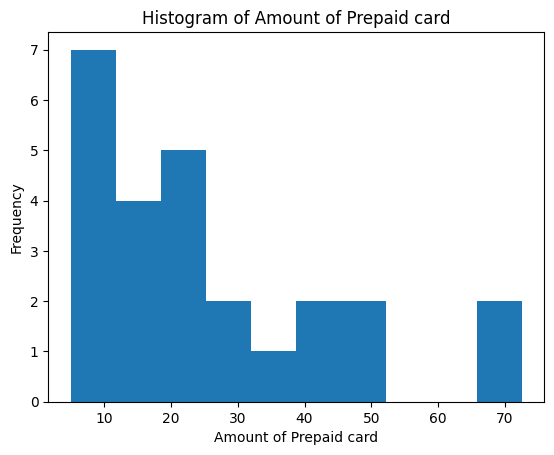

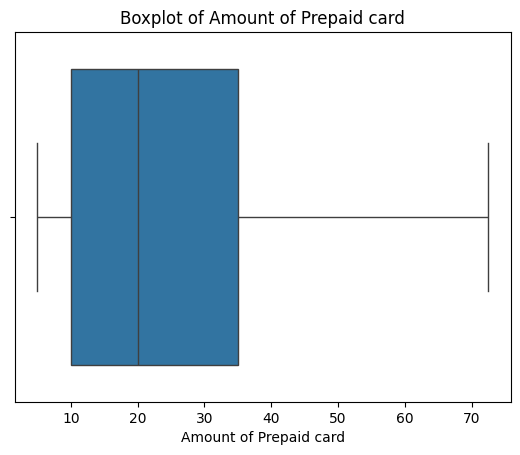

--------------------
Univariate Analysis for Age:
count    25.000000
mean     32.720000
std       8.403967
min      20.000000
25%      27.000000
50%      30.000000
75%      38.000000
max      51.000000
Name: Age, dtype: float64


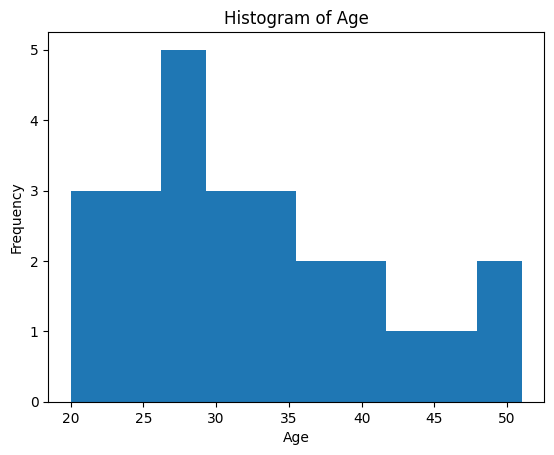

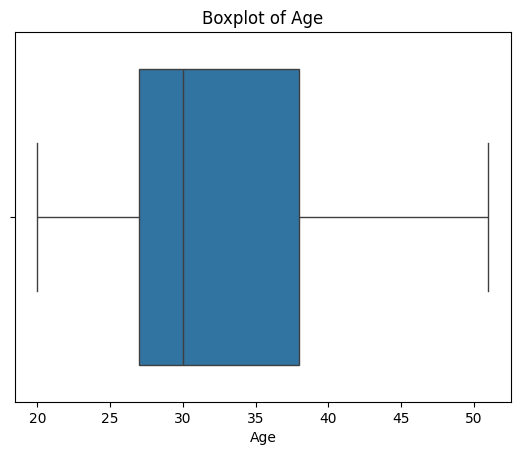

--------------------
Univariate Analysis for Days per month at starbucks:
count    25.000000
mean     10.720000
std       3.931921
min       3.000000
25%       8.000000
50%      10.000000
75%      12.000000
max      18.000000
Name: Days per month at starbucks, dtype: float64


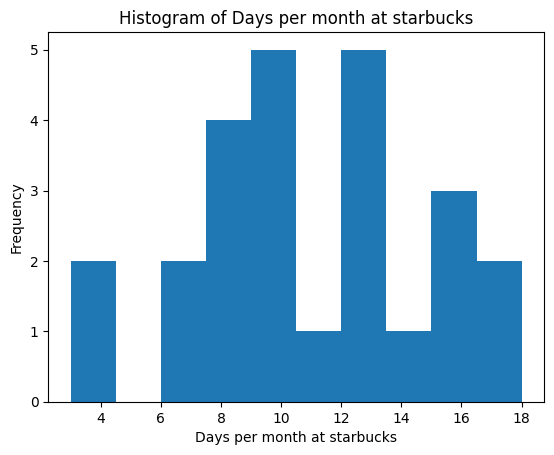

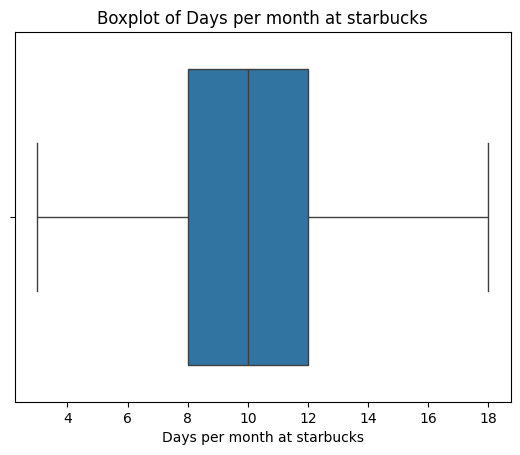

--------------------
Univariate Analysis for Income:
count    25.000000
mean     35.000000
std      10.801234
min      20.000000
25%      30.000000
50%      35.000000
75%      40.000000
max      55.000000
Name: Income, dtype: float64


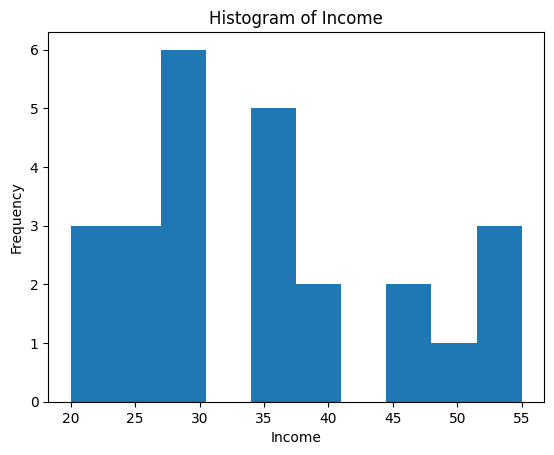

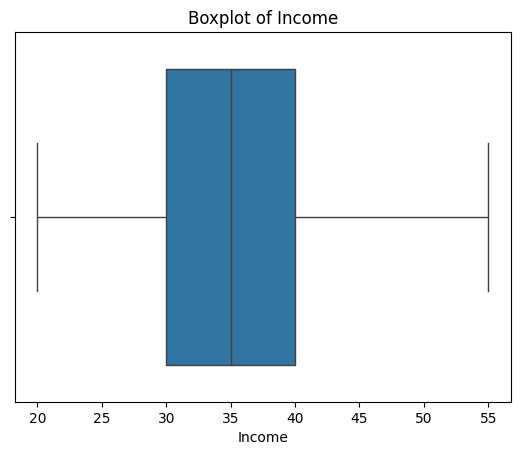

--------------------
Univariate Analysis for y:
count    25.000000
mean      4.520000
std       2.181742
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       8.000000
Name: Cups of Coffee per day, dtype: float64


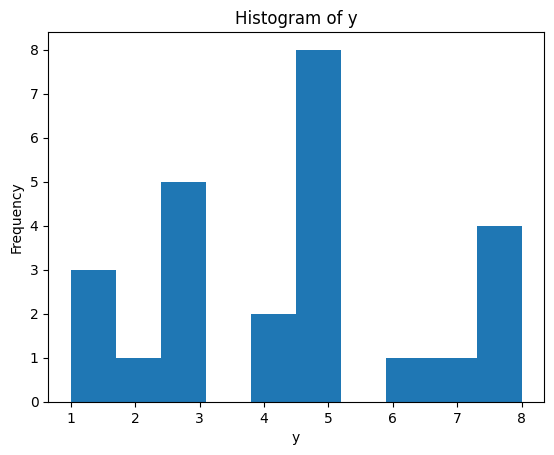

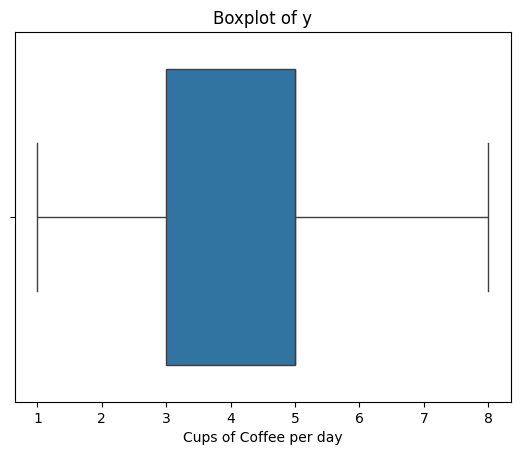

In [21]:
# punivariate analysis of  x and y

for col in x.columns:
  print(f"Univariate Analysis for {col}:")
  print(x[col].describe())  # Summary statistics
  plt.figure()
  plt.hist(x[col], bins=10)  # Histogram
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()
  plt.figure()
  sns.boxplot(x=x[col]) # Boxplot
  plt.title(f'Boxplot of {col}')
  plt.show()
  print("-" * 20)

# Univariate analysis for y
print(f"Univariate Analysis for y:")
print(y.describe())  # Summary statistics
plt.figure()
plt.hist(y, bins=10)  # Histogram
plt.title('Histogram of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()
plt.figure()
sns.boxplot(x=y) # Boxplot
plt.title('Boxplot of y')
plt.show()


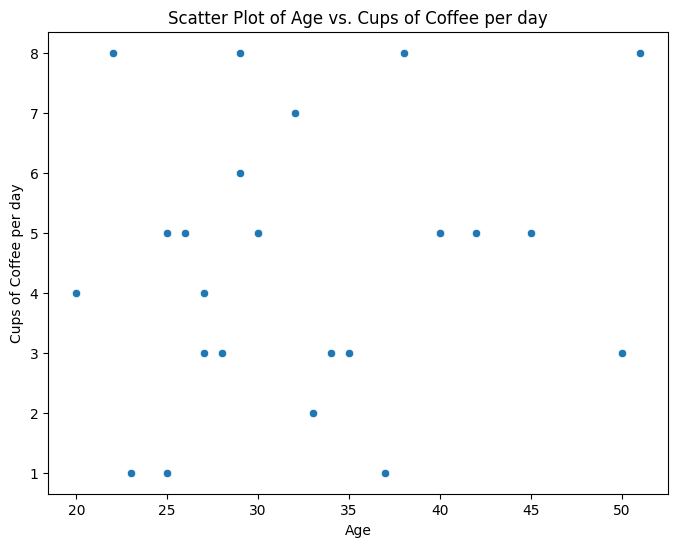

Correlation between Age and Cups of Coffee per day: 0.1628007886266795


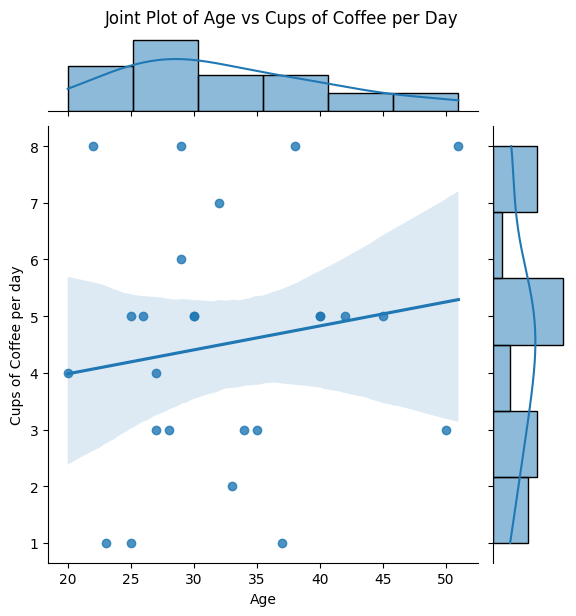

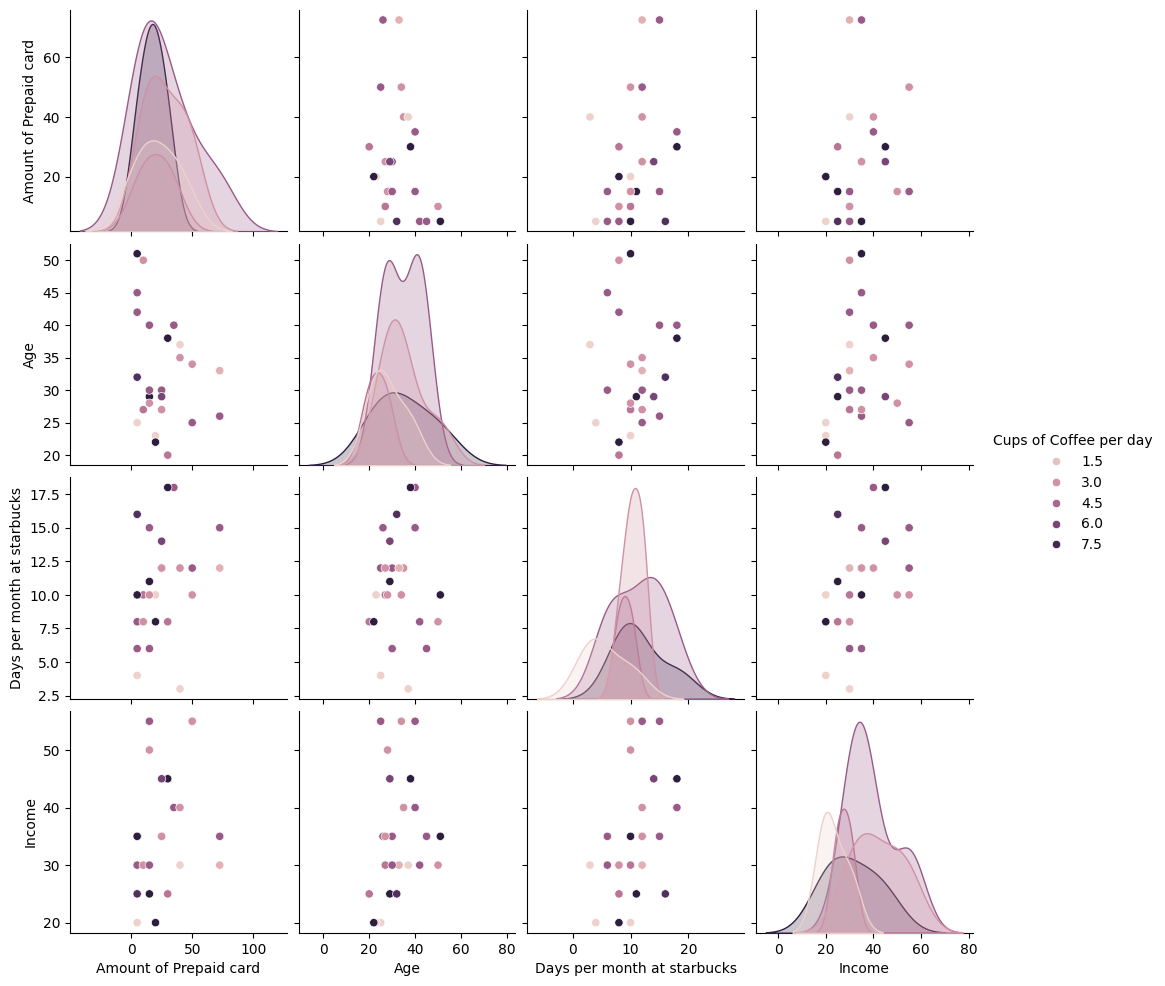

In [22]:
# bivariate analysis of x and y

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x['Age'], y=y)  # Replace 'Age' with other columns in x for different analyses
plt.title('Scatter Plot of Age vs. Cups of Coffee per day')
plt.xlabel('Age')
plt.ylabel('Cups of Coffee per day')
plt.show()

# Correlation coefficient
correlation = x['Age'].corr(y)  # Replace 'Age' with the desired column from x
print(f"Correlation between Age and Cups of Coffee per day: {correlation}")

# Joint plot (combines scatter plot, histograms)
sns.jointplot(x=x['Age'], y=y, kind="reg") # Replace 'Age' as needed
plt.suptitle('Joint Plot of Age vs Cups of Coffee per Day', y=1.02)
plt.show()

# Pairplot to visualize relationship between multiple features of x with y
sns.pairplot(pd.concat([x,y], axis = 1), hue = 'Cups of Coffee per day')
plt.show()

# Boxplots to see distribution of y for each category in x (if x has categorical features):
# Example: Assuming 'Gender' is a categorical column in x
# sns.boxplot(x='Gender', y=y, data=pd.concat([x,y],axis=1))
# plt.show()


In [23]:
# extracting multiple linear regression equation

import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

coefficients = model.params
intercept = coefficients['const']

# Create the equation string
equation = f"y = {intercept:.2f}"
for i, col in enumerate(x.columns[1:]):  # Iterate through independent variables (excluding the constant)
    equation += f" + ({coefficients[col]:.2f})*{col}"

print("\nMultiple Linear Regression Equation:")
equation


                              OLS Regression Results                              
Dep. Variable:     Cups of Coffee per day   R-squared:                       0.344
Model:                                OLS   Adj. R-squared:                  0.212
Method:                     Least Squares   F-statistic:                     2.617
Date:                    Mon, 15 Sep 2025   Prob (F-statistic):             0.0659
Time:                            18:40:34   Log-Likelihood:                -49.204
No. Observations:                      25   AIC:                             108.4
Df Residuals:                          20   BIC:                             114.5
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

'y = 2.10 + (-0.04)*Amount of Prepaid card + (0.02)*Age + (0.32)*Days per month at starbucks + (-0.02)*Income'

In [24]:
# dropping all the columns from variable x having p value > 0.05, one by one in descending

def stepwise_regression(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())

    columns_to_remove = []
    while True:
      max_p_value = 0
      column_to_remove = None
      for col in x.columns[1:]: # iterate through columns to check p-value, excluding constant
        if model.pvalues[col] > 0.05 and model.pvalues[col] > max_p_value:
            max_p_value = model.pvalues[col]
            column_to_remove = col

      if column_to_remove is None:
        break

      print(f"\nRemoving column: {column_to_remove}")
      columns_to_remove.append(column_to_remove)

      x = x.drop(column_to_remove, axis=1)

      model = sm.OLS(y,x).fit()
      print(model.summary())

    print(f"Columns removed: {columns_to_remove}")
    return model

stepwise_regression(x,y)


                              OLS Regression Results                              
Dep. Variable:     Cups of Coffee per day   R-squared:                       0.344
Model:                                OLS   Adj. R-squared:                  0.212
Method:                     Least Squares   F-statistic:                     2.617
Date:                    Mon, 15 Sep 2025   Prob (F-statistic):             0.0659
Time:                            18:40:36   Log-Likelihood:                -49.204
No. Observations:                      25   AIC:                             108.4
Df Residuals:                          20   BIC:                             114.5
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Shapiro-Wilk Test for Normality:
Statistic: 0.9844012080896496
P-value: 0.9562732592173004

Jarque-Bera Test for Normality:
Statistic: 0.4112562046221417
P-value: 0.8141357952099102


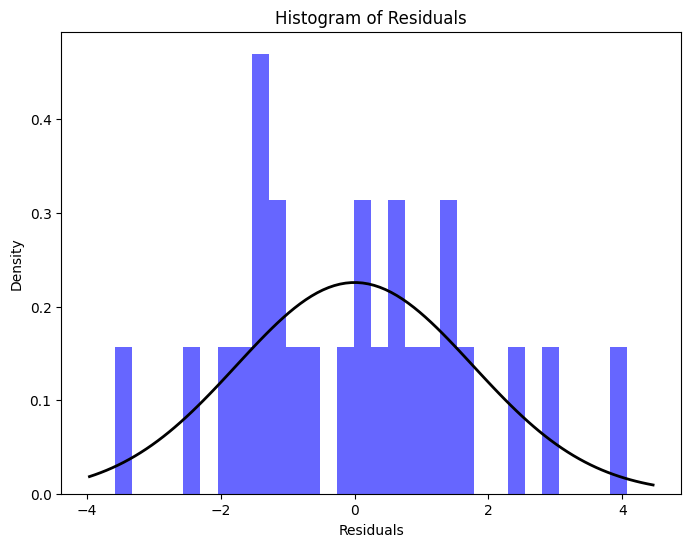

<Figure size 800x600 with 0 Axes>

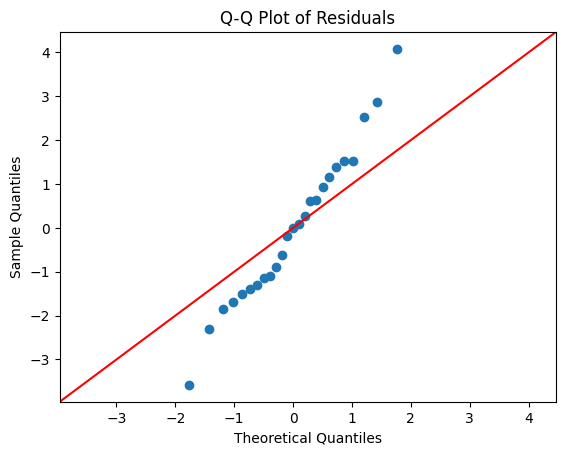


Summary Statistics of Residuals:
count    2.500000e+01
mean     1.705303e-15
std      1.767609e+00
min     -3.579375e+00
25%     -1.303105e+00
50%      5.286828e-05
75%      1.150358e+00
max      4.077876e+00
dtype: float64


In [25]:
# checking whether the residuals are following normal distribution and display summary

import statsmodels.api as sm
from scipy import stats

residuals = model.resid

# Check for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test for Normality:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Check for normality using Jarque-Bera test
jarque_bera_test = stats.jarque_bera(residuals)
print("\nJarque-Bera Test for Normality:")
print(f"Statistic: {jarque_bera_test.statistic}")
print(f"P-value: {jarque_bera_test.pvalue}")


# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='b')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Plot a normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# Create a Q-Q plot of the residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


# Display summary statistics of the residuals
print("\nSummary Statistics of Residuals:")
print(residuals.describe())


{'Test Statistic': np.float64(17.308601622763188), 'Test Statistic p-value': np.float64(0.24010517264005932), 'F-Statistic': np.float64(1.6074173078841192), 'F-Test p-value': np.float64(0.2274593315559586)}


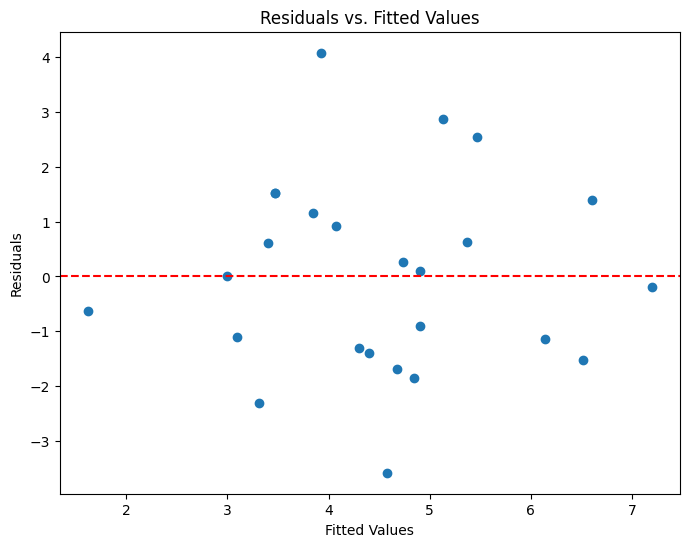

In [26]:
# checking if the residuals exhibit Homoscedasticity using white test, display summary and plot them in a scatter plot

# Assuming 'model' is the fitted OLS model from the previous code
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Perform White's test for heteroscedasticity
white_test = sms.het_white(model.resid, model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(lzip(labels, white_test)))


# Plot the residuals in a scatter plot against the fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

plt.show()
